In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

#  Випадковий набіо даних в 1000 значень

In [2]:
numbers1 = np.random.uniform(size = 1000, low = 0, high = 1)
numbers2 = np.random.uniform(size = 1000, low = 0, high = 1)
data = pd.DataFrame({'x': numbers1, 'y': numbers2})

In [3]:
data.head()

,x,y
0,0.900056,0.132097
1,0.652573,0.477568
2,0.256706,0.101011
3,0.525383,0.243737
4,0.420834,0.614892


# Нормалізація

In [4]:
data['x'] = (data['x'] - data['x'].min()) / (data['x'].max() - data['x'].min())

# Поділ на тестові та начальні вибірки

In [5]:
x = data[['x']]
y = data['y']

train_index =int(len(x) * 0.8)
train_data_x = x[:train_index]
test_data_x = x[train_index:]
train_data_y = y[:train_index]
test_data_y = y[train_index:]

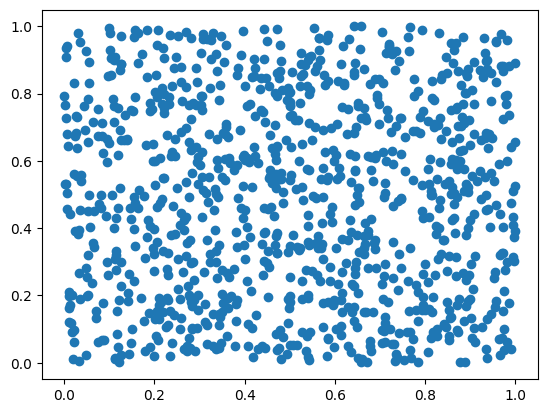

In [6]:
plt.plot(x, y, 'o')
plt.show()

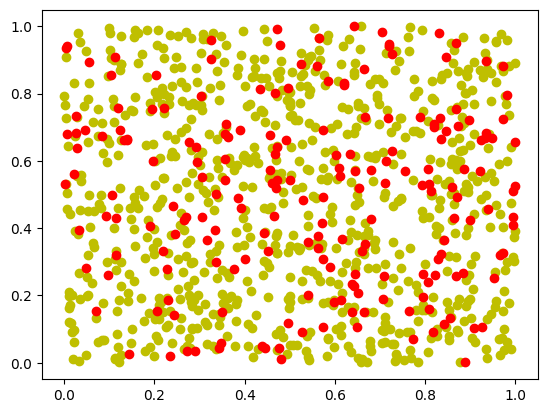

In [7]:
plt.plot(train_data_x, train_data_y, 'yo')
plt.plot(test_data_x, test_data_y, 'ro')
plt.show()

# Навчити KNN-регресор з різними значеннями К

In [8]:
result = []
for k in np.linspace(2, 20, 19):
  pr = KNeighborsRegressor(n_neighbors=int(k))
  pr.fit(train_data_x, train_data_y)
  predicted_y = pr.predict(train_data_x)
  mse = mean_squared_error(train_data_y, predicted_y)
  r2 = r2_score(train_data_y, predicted_y)
  result.append((int(k), mse, r2))

In [9]:
result

[(2, 0.044042195684993096, 0.4928714027197476),
 (3, 0.05830720691195546, 0.32861539728672473),
 (4, 0.06412459578613436, 0.26163044765576604),
 (5, 0.06706600650620485, 0.22776125768250777),
 (6, 0.07056841242320255, 0.18743242820050465),
 (7, 0.07349210468558925, 0.15376725931319357),
 (8, 0.07549451216268696, 0.1307103231352803),
 (9, 0.07753835682022878, 0.10717625408814857),
 (10, 0.07815231368831531, 0.10010678172282339),
 (11, 0.07917461483241298, 0.0883353852894504),
 (12, 0.07987377258812846, 0.08028485814340214),
 (13, 0.080399571638686, 0.07423048844603963),
 (14, 0.08078192529761997, 0.06982783613263033),
 (15, 0.08059887105059627, 0.07193563394051661),
 (16, 0.08152301927213883, 0.06129442988652323),
 (17, 0.08202387191564195, 0.05552730827522734),
 (18, 0.08256512651808975, 0.04929497396396676),
 (19, 0.08335446806738038, 0.040206015830955955),
 (20, 0.08381177539015297, 0.03494030149685701)]

In [10]:
df = pd.DataFrame(result, columns=['k', 'mse', 'R2'])
df

,k,mse,R2
0,2,0.044042,0.492871
1,3,0.058307,0.328615
2,4,0.064125,0.261630
3,5,0.067066,0.227761
4,6,0.070568,0.187432
5,7,0.073492,0.153767
6,8,0.075495,0.130710
7,9,0.077538,0.107176
8,10,0.078152,0.100107
9,11,0.079175,0.088335


# Вибрати величину К для найкращих показників якості регресії  тестовій вибірці

In [11]:
best_k_mse = df.loc[df['mse'].idxmin()]['k']

# Find the best k value based on R2 (highest R2)
best_k_r2 = df.loc[df['R2'].idxmax()]['k']

print("Best k based on MSE (lowest MSE):", best_k_mse)
print("Best k based on R2 (highest R2):", best_k_r2)

Best k based on MSE (lowest MSE): 2.0
Best k based on R2 (highest R2): 2.0


# Відтворення на тестовій вибірці

In [12]:
result = []
for k in np.linspace(2, 20, 19):
  pr = KNeighborsRegressor(n_neighbors=int(k))
  pr.fit(test_data_x, test_data_y)
  predicted_y = pr.predict(test_data_x)
  mse = mean_squared_error(test_data_y, predicted_y)
  r2 = r2_score(test_data_y, predicted_y)
  result.append((int(k), mse, r2))

In [13]:
df = pd.DataFrame(result, columns=['k', 'mse', 'R2'])
df

,k,mse,R2
0,2,0.032816,0.529204
1,3,0.049002,0.297002
2,4,0.053080,0.238490
3,5,0.057143,0.180202
4,6,0.058420,0.161883
5,7,0.059555,0.145608
6,8,0.060639,0.130042
7,9,0.062553,0.102588
8,10,0.062302,0.106190
9,11,0.063939,0.082713


In [14]:
best_k_mse = df.loc[df['mse'].idxmin()]['k']

# Find the best k value based on R2 (highest R2)
best_k_r2 = df.loc[df['R2'].idxmax()]['k']

print("Best k based on MSE (lowest MSE):", best_k_mse)
print("Best k based on R2 (highest R2):", best_k_r2)

Best k based on MSE (lowest MSE): 2.0
Best k based on R2 (highest R2): 2.0
